In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import binned_statistic
from scipy.signal import find_peaks
from scipy.optimize import curve_fit  # Add this import statement
def bin_tf_to_fpp(x, power, bin_count):
    if x.ndim == 1:  # Handle the case when x is of size (2)
        bin_ranges = np.arange(x[0], x[1], 1)
        fpp = binned_statistic(bin_ranges, power[:, x[0]:x[1]], 'mean', bins=bin_count)[0]
        fpp = np.expand_dims(fpp, axis=0)  # Add an extra dimension to match the desired output shape
    elif x.ndim == 2:  # Handle the case when x is of size (n, 2)
        fpp = []
        for i in range(x.shape[0]):
            bin_ranges = np.arange(x[i, 0], x[i, 1], 1)
            fpp_row = binned_statistic(bin_ranges, power[:, x[i, 0]:x[i, 1]], 'mean', bins=bin_count)[0]
            fpp.append(fpp_row)
        fpp = np.array(fpp)
    else:
        raise ValueError("Invalid size for x")

    return fpp

def adaptive_threshold(data, window_size):
    std_values = np.zeros_like(data)
    
    for i in range(len(data)):
        start = max(0, i - window_size)
        end = min(len(data), i + window_size)
        std_values[i] = np.std(data[start:end])

    return std_values


Processing file: E:\Donders\1\processed\CN\post_trial1_2017-09-28_11-30-59\post_trial1_2017-09-28_11-30-59_REM_dict.h5
Available groups: ['post_trial1_2017-09-28_11-30-59']
The shape of wavelet_transform for REM 1 is: (120, 212500)
Group 'post_trial1_2017-09-28_11-30-59' not found in the HDF5 file.
Processing file: E:\Donders\1\processed\CN\post_trial2_2017-09-28_12-21-41\post_trial2_2017-09-28_12-21-41_REM_dict.h5
Available groups: ['post_trial2_2017-09-28_12-21-41']
The shape of wavelet_transform for REM 1 is: (120, 157500)
Group 'post_trial2_2017-09-28_12-21-41' not found in the HDF5 file.
Processing file: E:\Donders\1\processed\CN\post_trial3_2017-09-28_13-12-53\post_trial3_2017-09-28_13-12-53_REM_dict.h5
Available groups: ['post_trial3_2017-09-28_13-12-53']
The shape of wavelet_transform for REM 1 is: (120, 52500)
The shape of wavelet_transform for REM 2 is: (120, 145000)
The shape of wavelet_transform for REM 3 is: (120, 47500)
The shape of wavelet_transform for REM 4 is: (120, 7

The shape of wavelet_transform for REM 1 is: (120, 157500)
The shape of wavelet_transform for REM 2 is: (120, 157500)
Group 'post_trial1_2017-09-25_11-26-43' not found in the HDF5 file.
Processing file: E:\Donders\1\processed\study_day_2_OR\post_trial2_2017-09-25_12-17-49\post_trial2_2017-09-25_12-17-49_REM_dict.h5
Available groups: ['post_trial2_2017-09-25_12-17-49']
The shape of wavelet_transform for REM 1 is: (120, 15000)
The shape of wavelet_transform for REM 2 is: (120, 5000)
The shape of wavelet_transform for REM 3 is: (120, 20000)
The shape of wavelet_transform for REM 4 is: (120, 27500)
The shape of wavelet_transform for REM 5 is: (120, 15000)
Group 'post_trial2_2017-09-25_12-17-49' not found in the HDF5 file.
Processing file: E:\Donders\1\processed\study_day_2_OR\post_trial3_2017-09-25_13-08-52\post_trial3_2017-09-25_13-08-52_REM_dict.h5
Available groups: ['post_trial3_2017-09-25_13-08-52']
The shape of wavelet_transform for REM 1 is: (120, 150000)
The shape of wavelet_transfo

Group 'post_trial1_2017-11-16_11-23-46' not found in the HDF5 file.
Processing file: E:\Donders\3\processed\OD\post_trial2_2017-11-16_12-14-17\post_trial2_2017-11-16_12-14-17_REM_dict.h5
Available groups: ['post_trial2_2017-11-16_12-14-17']
The shape of wavelet_transform for REM 1 is: (120, 232500)
Group 'post_trial2_2017-11-16_12-14-17' not found in the HDF5 file.
Processing file: E:\Donders\3\processed\OD\post_trial3_2017-11-16_13-04-51\post_trial3_2017-11-16_13-04-51_REM_dict.h5
Available groups: ['post_trial3_2017-11-16_13-04-51']
The shape of wavelet_transform for REM 1 is: (120, 182500)
The shape of wavelet_transform for REM 2 is: (120, 505000)
The shape of wavelet_transform for REM 3 is: (120, 342500)
Group 'post_trial3_2017-11-16_13-04-51' not found in the HDF5 file.
Processing file: E:\Donders\3\processed\OD\post_trial4_2017-11-16_13-55-23\post_trial4_2017-11-16_13-55-23_REM_dict.h5
Available groups: ['post_trial4_2017-11-16_13-55-23']
The shape of wavelet_transform for REM 1 

The shape of wavelet_transform for REM 1 is: (120, 217500)
The shape of wavelet_transform for REM 2 is: (120, 152500)
Group 'post_trial4_2017-11-21_13-25-29' not found in the HDF5 file.
Processing file: E:\Donders\3\processed\Rat_OS_Ephys_Rat3_SD5_OR_N_21-22_11_2017\post_trial5_2017-11-21_14-49-47\post_trial5_2017-11-21_14-49-47_REM_dict.h5
Available groups: ['post_trial5_2017-11-21_14-49-47']
The shape of wavelet_transform for REM 1 is: (120, 432500)
The shape of wavelet_transform for REM 2 is: (120, 190000)
The shape of wavelet_transform for REM 3 is: (120, 285000)
The shape of wavelet_transform for REM 4 is: (120, 377500)
The shape of wavelet_transform for REM 5 is: (120, 202500)
The shape of wavelet_transform for REM 6 is: (120, 162500)
The shape of wavelet_transform for REM 7 is: (120, 80000)
The shape of wavelet_transform for REM 8 is: (120, 567500)
Group 'post_trial5_2017-11-21_14-49-47' not found in the HDF5 file.
Processing file: E:\Donders\3\processed\Rat_OS_Ephys_Rat3_SD5_OR

The shape of wavelet_transform for REM 1 is: (120, 300000)
The shape of wavelet_transform for REM 10 is: (120, 40000)
The shape of wavelet_transform for REM 11 is: (120, 135000)
The shape of wavelet_transform for REM 12 is: (120, 82500)
The shape of wavelet_transform for REM 13 is: (120, 245000)
The shape of wavelet_transform for REM 14 is: (120, 340000)
The shape of wavelet_transform for REM 2 is: (120, 122500)
The shape of wavelet_transform for REM 3 is: (120, 312500)
The shape of wavelet_transform for REM 4 is: (120, 190000)
The shape of wavelet_transform for REM 5 is: (120, 55000)
The shape of wavelet_transform for REM 6 is: (120, 150000)
The shape of wavelet_transform for REM 7 is: (120, 310000)
The shape of wavelet_transform for REM 8 is: (120, 242500)
The shape of wavelet_transform for REM 9 is: (120, 40000)
Group 'post_trial5_2017-12-21_16-02-00' not found in the HDF5 file.
Processing file: E:\Donders\4\processed\OD\presleep_2017-12-21_11-48-07\presleep_2017-12-21_11-48-07_REM_

The shape of wavelet_transform for REM 1 is: (120, 212500)
The shape of wavelet_transform for REM 2 is: (120, 327500)
Group 'post_trial4_2017-12-18_13-08-50' not found in the HDF5 file.
Processing file: E:\Donders\4\processed\Rat_OS_Ephys_Rat4_SD4_OR_N_18-19_12_2017\post_trial5_2017-12-18_14-30-11\post_trial5_2017-12-18_14-30-11_REM_dict.h5
Available groups: ['post_trial5_2017-12-18_14-30-11']
The shape of wavelet_transform for REM 1 is: (120, 282500)
The shape of wavelet_transform for REM 10 is: (120, 230000)
The shape of wavelet_transform for REM 11 is: (120, 135000)
The shape of wavelet_transform for REM 12 is: (120, 82500)
The shape of wavelet_transform for REM 2 is: (120, 350000)
The shape of wavelet_transform for REM 3 is: (120, 322500)
The shape of wavelet_transform for REM 4 is: (120, 40000)
The shape of wavelet_transform for REM 5 is: (120, 202500)
The shape of wavelet_transform for REM 6 is: (120, 80000)
The shape of wavelet_transform for REM 7 is: (120, 162500)
The shape of 

The shape of wavelet_transform for REM 1 is: (120, 330000)
The shape of wavelet_transform for REM 2 is: (120, 180000)
Group 'Post_trial3_2018-02-16_13-15-26' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day1_HC_16feb2018\Post_trial4_2018-02-16_14-05-50\Post_trial4_2018-02-16_14-05-50_REM_dict.h5
Available groups: ['Post_trial4_2018-02-16_14-05-50']
The shape of wavelet_transform for REM 1 is: (120, 367500)
The shape of wavelet_transform for REM 2 is: (120, 27500)
The shape of wavelet_transform for REM 3 is: (120, 355000)
The shape of wavelet_transform for REM 4 is: (120, 85000)
Group 'Post_trial4_2018-02-16_14-05-50' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day1_HC_16feb2018\Post_trial5_2018-02-16_14-56-20\Post_trial5_2018-02-16_14-56-20_REM_dict.h5
Available groups: ['Post_trial5_2018-02-16_14-56-20']
The shape of wavelet_transform for REM 1 is: (120, 282500)
The shape of wavelet_transform for REM 2 is: (120, 140000)
The sh

The shape of wavelet_transform for REM 1 is: (120, 107500)
Group 'Post_trial1_2018-02-26_10-24-24' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day5_OR_26_27feb2018\Post_trial2_2018-02-26_11-15-00\Post_trial2_2018-02-26_11-15-00_REM_dict.h5
Available groups: ['Post_trial2_2018-02-26_11-15-00']
The shape of wavelet_transform for REM 1 is: (120, 175000)
Group 'Post_trial2_2018-02-26_11-15-00' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day5_OR_26_27feb2018\Post_trial3_2018-02-26_12-05-38\Post_trial3_2018-02-26_12-05-38_REM_dict.h5
Available groups: ['Post_trial3_2018-02-26_12-05-38']
The shape of wavelet_transform for REM 1 is: (120, 165000)
The shape of wavelet_transform for REM 2 is: (120, 307500)
Group 'Post_trial3_2018-02-26_12-05-38' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day5_OR_26_27feb2018\Post_trial4_2018-02-26_12-56-15\Post_trial4_2018-02-26_12-56-15_REM_dict.h5
Available groups: ['Pos

The shape of wavelet_transform for REM 1 is: (120, 65000)
The shape of wavelet_transform for REM 2 is: (120, 190000)
Group '2018-03-01_11-24-38_Post_trial2' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day7_OR_N_1_2mar2018\2018-03-01_12-15-12_Post_trial3\2018-03-01_12-15-12_Post_trial3_REM_dict.h5
Available groups: ['2018-03-01_12-15-12_Post_trial3']
The shape of wavelet_transform for REM 1 is: (120, 147500)
The shape of wavelet_transform for REM 2 is: (120, 152500)
The shape of wavelet_transform for REM 3 is: (120, 157500)
The shape of wavelet_transform for REM 4 is: (120, 355000)
The shape of wavelet_transform for REM 5 is: (120, 210000)
Group '2018-03-01_12-15-12_Post_trial3' not found in the HDF5 file.
Processing file: E:\Donders\6\processed\Study_day7_OR_N_1_2mar2018\2018-03-01_13-05-56_Post_trial4\2018-03-01_13-05-56_Post_trial4_REM_dict.h5
Available groups: ['2018-03-01_13-05-56_Post_trial4']
The shape of wavelet_transform for REM 1 is: (120, 105000)

Processing file: E:\Donders\9\processed\2018_06_27_Study_day_16_or_nov\2018-06-27_09-13-35_pre-sleep\2018-06-27_09-13-35_pre-sleep_REM_dict.h5
Available groups: ['2018-06-27_09-13-35_pre-sleep']
Group '2018-06-27_09-13-35_pre-sleep' not found in the HDF5 file.
Processing file: E:\Donders\9\processed\2018_06_27_Study_day_16_or_nov\2018-06-27_10-04-32_Post_Trial1\2018-06-27_10-04-32_Post_Trial1_REM_dict.h5
Available groups: ['2018-06-27_10-04-32_Post_Trial1']
The shape of wavelet_transform for REM 1 is: (120, 267500)
Group '2018-06-27_10-04-32_Post_Trial1' not found in the HDF5 file.
Processing file: E:\Donders\9\processed\2018_06_27_Study_day_16_or_nov\2018-06-27_10-55-01_Post_Trial2\2018-06-27_10-55-01_Post_Trial2_REM_dict.h5
Available groups: ['2018-06-27_10-55-01_Post_Trial2']
Group '2018-06-27_10-55-01_Post_Trial2' not found in the HDF5 file.
Processing file: E:\Donders\9\processed\2018_06_27_Study_day_16_or_nov\2018-06-27_11-45-36_Post_Trial3\2018-06-27_11-45-36_Post_Trial3_REM_dic

The shape of wavelet_transform for REM 2 is: (120, 240000)
The shape of wavelet_transform for REM 3 is: (120, 22500)
The shape of wavelet_transform for REM 4 is: (120, 55000)
The shape of wavelet_transform for REM 5 is: (120, 167500)
The shape of wavelet_transform for REM 6 is: (120, 197500)
The shape of wavelet_transform for REM 7 is: (120, 205000)
The shape of wavelet_transform for REM 8 is: (120, 75000)
The shape of wavelet_transform for REM 9 is: (120, 100000)
Group '2018-05-13_11-26-26_Post_Trial2' not found in the HDF5 file.
Processing file: E:\Donders\9\processed\HC\2018-05-13_12-16-38_Post_Trial3\2018-05-13_12-16-38_Post_Trial3_REM_dict.h5
Available groups: ['2018-05-13_12-16-38_Post_Trial3']
The shape of wavelet_transform for REM 1 is: (120, 147500)
The shape of wavelet_transform for REM 2 is: (120, 345000)
The shape of wavelet_transform for REM 3 is: (120, 175000)
The shape of wavelet_transform for REM 4 is: (120, 365000)
The shape of wavelet_transform for REM 5 is: (120, 107

The shape of wavelet_transform for REM 2 is: (120, 372500)
The shape of wavelet_transform for REM 3 is: (120, 87500)
The shape of wavelet_transform for REM 4 is: (120, 87500)
The shape of wavelet_transform for REM 5 is: (120, 47500)
Group '2018-10-29_14-22-53_Post_Trial4' not found in the HDF5 file.
Processing file: E:\Donders\11\processed\CN\2018-10-29_15-13-49_Post_Trial5\2018-10-29_15-13-49_Post_Trial5_REM_dict.h5
Available groups: ['2018-10-29_15-13-49_Post_Trial5']
The shape of wavelet_transform for REM 1 is: (120, 395000)
The shape of wavelet_transform for REM 10 is: (120, 252500)
The shape of wavelet_transform for REM 11 is: (120, 22500)
The shape of wavelet_transform for REM 12 is: (120, 70000)
The shape of wavelet_transform for REM 13 is: (120, 137500)
The shape of wavelet_transform for REM 14 is: (120, 287500)
The shape of wavelet_transform for REM 15 is: (120, 17500)
The shape of wavelet_transform for REM 16 is: (120, 17500)
The shape of wavelet_transform for REM 17 is: (120

The shape of wavelet_transform for REM 18 is: (120, 62500)
The shape of wavelet_transform for REM 19 is: (120, 250000)
The shape of wavelet_transform for REM 2 is: (120, 362500)
The shape of wavelet_transform for REM 20 is: (120, 162500)
The shape of wavelet_transform for REM 21 is: (120, 195000)
The shape of wavelet_transform for REM 22 is: (120, 165000)
The shape of wavelet_transform for REM 23 is: (120, 105000)
The shape of wavelet_transform for REM 24 is: (120, 22500)
The shape of wavelet_transform for REM 3 is: (120, 85000)
The shape of wavelet_transform for REM 4 is: (120, 80000)
The shape of wavelet_transform for REM 5 is: (120, 347500)
The shape of wavelet_transform for REM 6 is: (120, 135000)
The shape of wavelet_transform for REM 7 is: (120, 122500)
The shape of wavelet_transform for REM 8 is: (120, 92500)
The shape of wavelet_transform for REM 9 is: (120, 280000)
Group '2018-10-31_14-39-12_Post_Trial5' not found in the HDF5 file.
Processing file: E:\Donders\11\processed\OR\2

The shape of wavelet_transform for REM 1 is: (120, 390000)
The shape of wavelet_transform for REM 10 is: (120, 205000)
The shape of wavelet_transform for REM 11 is: (120, 190000)
The shape of wavelet_transform for REM 2 is: (120, 345000)
The shape of wavelet_transform for REM 3 is: (120, 410000)
The shape of wavelet_transform for REM 4 is: (120, 60000)
The shape of wavelet_transform for REM 5 is: (120, 435000)
The shape of wavelet_transform for REM 6 is: (120, 102500)
The shape of wavelet_transform for REM 7 is: (120, 415000)
The shape of wavelet_transform for REM 8 is: (120, 52500)
The shape of wavelet_transform for REM 9 is: (120, 102500)
Group '2019-06-06_15-39-11_post_trial5' not found in the HDF5 file.
Processing file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD12_OR_SD_10-11_06_2019\2019-06-10_13-10-58_presleep\2019-06-10_13-10-58_presleep_REM_dict.h5
Available groups: ['2019-06-10_13-10-58_presleep']
Group '2019-06-10_13-10-58_presleep' not found in the HDF5 file.
Proce

The shape of wavelet_transform for REM 2 is: (120, 130000)
The shape of wavelet_transform for REM 3 is: (120, 210000)
The shape of wavelet_transform for REM 4 is: (120, 295000)
The shape of wavelet_transform for REM 5 is: (120, 112500)
The shape of wavelet_transform for REM 6 is: (120, 42500)
Group '2019-05-16_13-00-09_post_trial3' not found in the HDF5 file.
Processing file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD3_OR_16-17_05_2019\2019-05-16_13-51-09_post_trial4\2019-05-16_13-51-09_post_trial4_REM_dict.h5
Available groups: ['2019-05-16_13-51-09_post_trial4']
The shape of wavelet_transform for REM 1 is: (120, 467500)
The shape of wavelet_transform for REM 2 is: (120, 85000)
The shape of wavelet_transform for REM 3 is: (120, 372500)
Group '2019-05-16_13-51-09_post_trial4' not found in the HDF5 file.
Processing file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD3_OR_16-17_05_2019\2019-05-16_14-41-48_post_trial5\2019-05-16_14-41-48_post_trial5_REM_dict.h5
Available gr

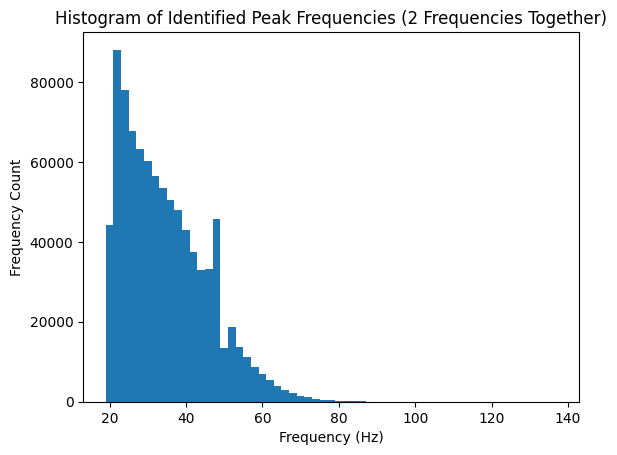

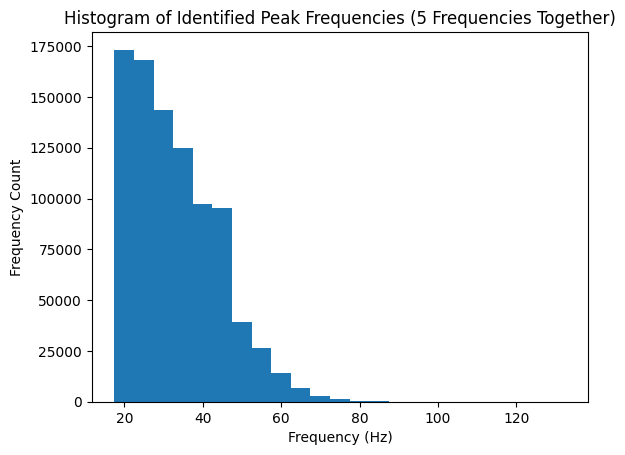

In [7]:
import os
import glob
import h5py
import numpy as np
from scipy.stats import zscore
from scipy.signal import find_peaks
import matplotlib.pyplot as plt


# Define the root folder containing '1', '3','4', '6', '9', '11', '13' folders
root_folder = r"E:\Donders"

# Define the target folders
target_folders = ['1', '3','4', '6', '9', '11', '13']

# Histogram to accumulate peak frequencies
histogram_bins = np.arange(20, 140, 1)
# Histogram to accumulate peak frequencies
histogram_bins_2freq = np.arange(20, 140, 2)
histogram_counts_2freq = np.zeros(len(histogram_bins_2freq) - 1)

histogram_bins_5freq = np.arange(20, 140, 5)
histogram_counts_5freq = np.zeros(len(histogram_bins_5freq) - 1)
#histogram_counts = np.zeros(len(histogram_bins) - 1)
frequencies = np.arange(20, 140, 1)

for target_folder in target_folders:
    # Construct the path to the processed folders
    processed_folder = os.path.join(root_folder, target_folder, 'processed')

    # Iterate through subfolders in processed folder
    for subfolder in os.listdir(processed_folder):
        subfolder_path = os.path.join(processed_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Iterate through sub-subfolders (containing datasets)
            for dataset_folder in os.listdir(subfolder_path):
                dataset_folder_path = os.path.join(subfolder_path, dataset_folder)

                # Check if it's a directory
                if os.path.isdir(dataset_folder_path):
                    # Use glob to get all .h5 files in the dataset folder
                    hdf5_files = glob.glob(os.path.join(dataset_folder_path, '*.h5'))

                    # Iterate over each .h5 file
                    for hdf5_file_path in hdf5_files:
                        # Open the HDF5 file in read mode
                        with h5py.File(hdf5_file_path, 'r') as hdf_file:
                            # Iterate over all groups in the file
                            for group_name in hdf_file.keys():
                                # Access the current group
                                # Print debugging information
                                print(f"Processing file: {hdf5_file_path}")
                                print(f"Available groups: {list(hdf_file.keys())}")
                                current_group = hdf_file[group_name]

                                # Continue with your processing for the current group
                                rem_dict_keys = list(current_group.keys())
                                subset_frequencies = np.arange(20, 140, 1)
                                for rem_key in rem_dict_keys:
                                    # Access the 'wavelet_transform' key for the current REM period
                                    wavelet_transform = hdf_file[group_name][rem_key]['wavelet_transform'][:]
                                    print(f"The shape of wavelet_transform for {rem_key} is: {wavelet_transform.shape}")

                                    # Square each value in the matrix to get power
                                    power_matrix = np.square(wavelet_transform)

                                    # Z-score along the frequency axis
                                    #power = zscore(power_matrix, axis=0)
                                    power=power_matrix

                                    mean_power_values = np.mean(np.log(power), axis=1)

                                    # Create a single figure for all plots
                                    #plt.figure(figsize=(10, 6))

                                    # Plotting the mean power values
                                    #plt.plot(frequencies, mean_power_values, marker='o', linestyle='-')
                                    # Calculate standard deviation and plot envelope
                                    #std_dev = np.std(np.log(power), axis=1)
                                    #upper_bound = mean_power_values + std_dev
                                    #lower_bound = mean_power_values - std_dev

                                    #plt.fill_between(frequencies, upper_bound, lower_bound, alpha=0.2, label='Standard Deviation Envelope')

                                    #plt.xlabel('Frequency (Hz)')
                                    #plt.ylabel('Mean Power')
                                    #plt.title(f'Mean Power from TF vs. Frequency for {rem_key}')
                                    #plt.legend()
                                    #plt.grid(True)
                                    #plt.yscale('log')
                                    #plt.show()

                                    start_end = hdf_file[group_name][rem_key]['start-end'][:]
                                    fpp_cycles = hdf_file[group_name][rem_key]['Cycles'][:]
                                    newcycles = fpp_cycles[:, [0, -1]] - start_end[0]

                                    # Calculate mean power values for the subset of frequencies
                                    fpp_plots = bin_tf_to_fpp(newcycles, power, 19)
                                   # mean_power_values = np.mean(fpp_plots[100], axis=1)
                                        # Calculate mean power values for all elements in fpp_plots
                                    # Find the index closest to 50Hz in subset_frequencies
                                    closest_index_to_50hz = np.argmin(np.abs(subset_frequencies - 50))
                                    closest_index_to_20hz = np.argmin(np.abs(subset_frequencies - 20))
                                    excluded_frequencies = [closest_index_to_50hz, closest_index_to_20hz]
                                    for i, fpp_plot in enumerate(fpp_plots):
                                        current_mean_power = np.mean(fpp_plot, axis=1)

                                        # Identify peaks with adaptive threshold
                                        adaptive_threshold_values = adaptive_threshold(current_mean_power, window_size=10)
                                        adaptive_peaks, _ = find_peaks(current_mean_power, height=np.mean(current_mean_power)-adaptive_threshold_values, prominence=np.min(adaptive_threshold_values), distance=5)
                                        # Exclude frequencies that are closest to 50Hz or 20Hz

                                       
                                        adaptive_peaks = [peak for peak in adaptive_peaks if peak not in excluded_frequencies]


                                        # Update the histogram directly for 2 frequencies together
                                        histogram_2freq, _ = np.histogram(subset_frequencies[adaptive_peaks], bins=histogram_bins_2freq)
                                        histogram_counts_2freq += histogram_2freq

                                        # Update the histogram directly for 5 frequencies together
                                        histogram_5freq, _ = np.histogram(subset_frequencies[adaptive_peaks], bins=histogram_bins_5freq)
                                        histogram_counts_5freq += histogram_5freq
                                    #for i, fpp_plot in enumerate(fpp_plots):
                                        #current_mean_power = np.mean(fpp_plot, axis=1)

                                        # Identify peaks with adaptive threshold
                                        #adaptive_threshold_values = adaptive_threshold(current_mean_power, window_size=10)
                                        #adaptive_peaks, _ = find_peaks(current_mean_power, height=np.mean(current_mean_power)-adaptive_threshold_values, prominence=np.min(adaptive_threshold_values), distance=5)
                                        # Exclude frequencies that are closest to 50Hz
                                        #adaptive_peaks = [peak for peak in adaptive_peaks if peak != closest_index_to_50hz]

                                        # Update the histogram directly
                                        #histogram, _ = np.histogram(subset_frequencies[adaptive_peaks], bins=histogram_bins)
                                        #histogram_counts += histogram


                                        # Plotting the mean power values
                                        #plt.figure(figsize=(10, 6))
                                        #plt.plot(frequencies, current_mean_power, marker='o', linestyle='-')

                                        # Plot envelope
                                        #std_dev = np.std(power, axis=1)
                                        #upper_bound = current_mean_power + std_dev
                                        #lower_bound = current_mean_power - std_dev
                                        #plt.fill_between(frequencies, upper_bound, lower_bound, alpha=0.2, label='Standard Deviation Envelope')

                                        # Plotting the subset of frequencies
                                        #subset_frequencies = frequencies[:current_mean_power.shape[0]]
                                        #plt.plot(subset_frequencies, current_mean_power, marker='o', linestyle='-', label='Subset of Frequencies')

                                        # Plot peaks
                                        #plt.plot(frequencies[adaptive_peaks], current_mean_power[adaptive_peaks], 'rx', label='Peaks')

                                        # Add labels and legend
                                        #plt.xlabel('Frequency (Hz)')
                                        #plt.ylabel('Mean Power')
                                        #plt.title('Mean Power across Phases for All Frequencies')
                                        #plt.legend()
                                        #plt.grid(True)
                                        #plt.yscale('log')
                                        #plt.show()

                                        # Plot the histogram as it gets updated
                                        #plt.figure(figsize=(10, 6))
                                        #plt.bar(histogram_bins[:-1], histogram_counts, width=1.0)
                                        #plt.xlabel('Frequency (Hz)')
                                        #plt.ylabel('Frequency Count')
                                        #plt.title('Histogram of Identified Peak Frequencies')
                                        #plt.show()

                            else:
                                print(f"Group '{group_name}' not found in the HDF5 file.")



# Plot the histogram
#plt.bar(histogram_bins[:-1], histogram_counts, width=1.0)
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Frequency Count')
#plt.title('Histogram of Identified Peak Frequencies')
#plt.show()

# Plot the histogram for 2 frequencies together
plt.bar(histogram_bins_2freq[:-1], histogram_counts_2freq, width=2.0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency Count')
plt.title('Histogram of Identified Peak Frequencies (2 Frequencies Together)')
plt.show()

# Plot the histogram for 5 frequencies together
plt.bar(histogram_bins_5freq[:-1], histogram_counts_5freq, width=5.0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency Count')
plt.title('Histogram of Identified Peak Frequencies (5 Frequencies Together)')
plt.show()
